# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

import mlflow
import mlflow.sklearn

import nbimporter
import fonctions_from_notebook_1

# Initialisation MLFlow

In [ ]:
#mlflow.set_tracking_uri("http://localhost:5000")  # Définir l'URI de suivi de MLflow (facultatif)
#mlflow.set_experiment("OC - Projet 6 - Traitement image")

# Préparation des datas pour l'entrainement

In [2]:
images_dir_OG= "./Datas/Images"
annotations_dir_OG= "./Datas/Annotation"
images_dir_S= "./Datas/Images_Small"
annotations_dir_S= "./Datas/Annotation_Small"
images_dir_M= "./Datas/Images_M"
annotations_dir_M= "./Datas/Annotation_M"
output_size=(224, 224)

# PROMPT

In [ ]:
'''datas = fonctions_from_notebook_1.get_dogs_picture_breed(images_dir_M,annotations_dir_M,output_size)
labels = datas['breed'].unique()
label_to_index = {label: idx for idx, label in enumerate(labels)}
datas['breed_idx'] = datas['breed'].map(label_to_index)


X = np.array(datas['image'])
y = to_categorical(datas['breed_idx'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Geler les couches de VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraîner le modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)'''

"datas = fonctions_from_notebook_1.get_dogs_picture_breed(images_dir_M,annotations_dir_M,output_size)\nlabels = datas['breed'].unique()\nlabel_to_index = {label: idx for idx, label in enumerate(labels)}\ndatas['breed_idx'] = datas['breed'].map(label_to_index)\n\n\nX = np.array(datas['image'])\ny = to_categorical(datas['breed_idx'])\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)\n\nbase_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))\nx = base_model.output\nx = Flatten()(x)\nx = Dense(256, activation='relu')(x)\nx = Dense(128, activation='relu')(x)\npredictions = Dense(len(labels), activation='softmax')(x)\n\nmodel = Model(inputs=base_model.input, outputs=predictions)\n\n# Geler les couches de VGG16\nfor layer in base_model.layers:\n    layer.trainable = False\n\n# Compiler le modèle\nmodel.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])\n\n# Early stopping\nearly_stopping 

# CODE

In [3]:
from tensorflow.keras.utils import img_to_array
datas_raw = fonctions_from_notebook_1.get_dogs_picture_breed_raw(images_dir_M,annotations_dir_M,output_size)
datas_altered = fonctions_from_notebook_1.get_dogs_picture_breed(images_dir_M,annotations_dir_M,output_size)

Processing directories: 100%|██████████| 31/31 [00:33<00:00,  1.09s/it, current_directory=./Datas/Images_M\n02093428-American_Staffordshire_terrier]


In [4]:
labels = datas_raw['breed'].unique()
label_to_index = {label: idx for idx, label in enumerate(labels)}
datas_raw['breed_idx'] = datas_raw['breed'].map(label_to_index)


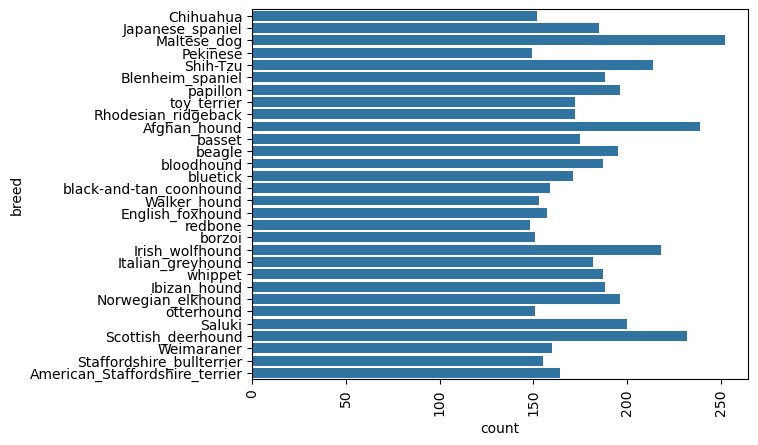

In [5]:
import seaborn as sns
sns.countplot(datas_raw['breed'])
plt.xticks(rotation=90)
plt.show()

In [6]:
def resize_images(image_list, target_size=(224, 224)):
    resized_images = []
    for image in image_list:
        if image.shape != target_size + (3,):
            print(image.shape)
            print("REZISE")
            image = tf.image.resize(image, target_size).numpy()
        resized_images.append(image)
    return np.array(resized_images)

# Appliquer la fonction de redimensionnement
X = resize_images(datas_raw['image'])
print(X.shape)  # Devrait maintenant être (20580, 224, 224, 3)

(5448, 224, 224, 3)


In [7]:
# Séparer les données en images et étiquettes
#X = np.array(datas['image'])
X = np.array([np.array(image) for image in datas_raw['image']])
print(X.shape)
y = to_categorical(datas_raw['breed_idx'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


(5448, 224, 224, 3)


In [8]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Geler les couches de VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

e:\Users\Beast-Of-War\miniconda3\envs\tf2_10\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraîner le modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/30
137/137 [==============================] - 21s 83ms/step - loss: 14.5629 - accuracy: 0.0599 - val_loss: 9.7324 - val_accuracy: 0.0963
Epoch 2/30
137/137 [==============================] - 10s 70ms/step - loss: 6.3970 - accuracy: 0.1905 - val_loss: 7.6171 - val_accuracy: 0.1248
Epoch 3/30
137/137 [==============================] - 10s 71ms/step - loss: 3.6796 - accuracy: 0.3681 - val_loss: 6.9881 - val_accuracy: 0.1523
Epoch 4/30
137/137 [==============================] - 10s 71ms/step - loss: 2.1432 - accuracy: 0.5721 - val_loss: 6.6699 - val_accuracy: 0.1706
Epoch 5/30
137/137 [==============================] - 10s 72ms/step - loss: 1.2371 - accuracy: 0.7308 - val_loss: 6.5347 - val_accuracy: 0.1835
Epoch 6/30
137/137 [==============================] - 10s 71ms/step - loss: 0.7122 - accuracy: 0.8472 - val_loss: 6.4001 - val_accuracy: 0.1982
Epoch 7/30
137/137 [==============================] - 10s 71ms/step - loss: 0.4127 - accuracy: 0.9128 - val_loss: 6.3644 - val_accuracy

In [10]:
# Évaluation sur les données de validation
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy*100:.2f}%')

35/35 [==============================] - 2s 57ms/step - loss: 6.2102 - accuracy: 0.2450
Validation accuracy: 24.50%


In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir les probabilités en classes
y_true = np.argmax(y_val, axis=1)  # Convertir les étiquettes one-hot en classes

report = classification_report(y_true, y_pred_classes, target_names=labels)
print(report)

35/35 [==============================] - 2s 56ms/step
                                precision    recall  f1-score   support

                     Chihuahua       0.16      0.14      0.15        35
              Japanese_spaniel       0.34      0.39      0.36        41
                   Maltese_dog       0.52      0.53      0.52        55
                      Pekinese       0.10      0.13      0.12        30
                      Shih-Tzu       0.29      0.30      0.29        44
              Blenheim_spaniel       0.23      0.21      0.22        39
                      papillon       0.37      0.37      0.37        43
                   toy_terrier       0.23      0.25      0.24        32
           Rhodesian_ridgeback       0.14      0.10      0.12        40
                  Afghan_hound       0.51      0.44      0.47        41
                        basset       0.26      0.34      0.29        29
                        beagle       0.18      0.15      0.16        48
         

# using datagen

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Appliquer l'augmentation aux données d'entraînement uniquement
train_datagen = datagen.flow(X_train, y_train, batch_size=32)

In [13]:
history = model.fit(
    train_datagen,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/30
137/137 [==============================] - 38s 276ms/step - loss: 5.3301 - accuracy: 0.1609 - val_loss: 4.3049 - val_accuracy: 0.2495
Epoch 2/30
137/137 [==============================] - 35s 253ms/step - loss: 3.9636 - accuracy: 0.1930 - val_loss: 3.8653 - val_accuracy: 0.2771
Epoch 3/30
137/137 [==============================] - 35s 256ms/step - loss: 3.7044 - accuracy: 0.2047 - val_loss: 3.5657 - val_accuracy: 0.3128
Epoch 4/30
137/137 [==============================] - 34s 251ms/step - loss: 3.4645 - accuracy: 0.2084 - val_loss: 3.3403 - val_accuracy: 0.3119
Epoch 5/30
137/137 [==============================] - 34s 247ms/step - loss: 3.2904 - accuracy: 0.2285 - val_loss: 3.2218 - val_accuracy: 0.3211
Epoch 6/30
137/137 [==============================] - 36s 262ms/step - loss: 3.1796 - accuracy: 0.2384 - val_loss: 3.0890 - val_accuracy: 0.3339
Epoch 7/30
137/137 [==============================] - 35s 253ms/step - loss: 3.0596 - accuracy: 0.2499 - val_loss: 3.0380 - val_ac

# using my alterations

In [14]:
labels = datas_altered['breed'].unique()
label_to_index = {label: idx for idx, label in enumerate(labels)}
datas_altered['breed_idx'] = datas_altered['breed'].map(label_to_index)

# Appliquer la fonction de redimensionnement
X = resize_images(datas_altered['image'])
print(X.shape)  # Devrait maintenant être (20580, 224, 224, 3)

X = np.array([np.array(image) for image in datas_altered['image']])
print(X.shape)
y = to_categorical(datas_altered['breed_idx'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


(5448, 224, 224, 3)
(5448, 224, 224, 3)


In [15]:
# Entraîner le modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/30
137/137 [==============================] - 11s 75ms/step - loss: 2.8757 - accuracy: 0.2910 - val_loss: 3.1586 - val_accuracy: 0.2202
Epoch 2/30
137/137 [==============================] - 9s 67ms/step - loss: 2.2073 - accuracy: 0.4091 - val_loss: 3.1729 - val_accuracy: 0.2275
Epoch 3/30
137/137 [==============================] - 9s 67ms/step - loss: 1.8406 - accuracy: 0.5223 - val_loss: 3.1967 - val_accuracy: 0.2303
Epoch 4/30
137/137 [==============================] - 9s 67ms/step - loss: 1.5914 - accuracy: 0.5991 - val_loss: 3.2295 - val_accuracy: 0.2330
Epoch 5/30
137/137 [==============================] - 9s 67ms/step - loss: 1.4000 - accuracy: 0.6613 - val_loss: 3.2582 - val_accuracy: 0.2339
Epoch 6/30
137/137 [==============================] - 9s 67ms/step - loss: 1.2465 - accuracy: 0.7116 - val_loss: 3.2770 - val_accuracy: 0.2385
